In [1]:
# importing the necessary libraries
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# paths to the files
forest_masks = {
    2001: "/shared_space/BrazilSPEI/MODIS/Reclass_Data/MCD12Q1_Maranhao_2001_forest.tif",
    2008: "/shared_space/BrazilSPEI/MODIS/Reclass_Data/MCD12Q1_Maranhao_2008_forest.tif",
    2016: "/shared_space/BrazilSPEI/MODIS/Reclass_Data/MCD12Q1_Maranhao_2016_forest.tif",
    2024: "/shared_space/BrazilSPEI/MODIS/Reclass_Data/MCD12Q1_Maranhao_2024_forest.tif"
}

In [3]:
# using a clean 2-color scheme
cmap = ListedColormap(['#f0f0f0', '#006400'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


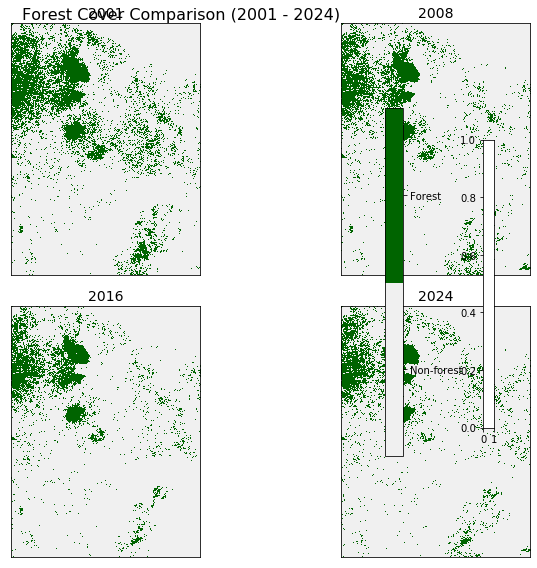

In [4]:
fig, ax_grid = plt.subplots(2, 2, figsize = (10, 8))
axes = ax_grid.ravel()
for ax, (year, path) in zip(axes, sorted(forest_masks.items())):
    with rasterio.open(path) as src:
        mask = src.read(1).astype(float) # converting to a numeric array
        bounds = src.bounds
        extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
    
    ax.imshow(mask, cmap = cmap, vmin = 0, vmax = 1, extent= extent)
    ax.set_title(str(year), fontsize = 14)
    ax.set_xticks([])
    ax.set_yticks([])
    
# shared colorbar
cbar_ax = fig.add_axes([0.92, 0.25, 0.015, 0.5])
cbar = fig.colorbar(
    plt.cm.ScalarMappable(cmap=cmap),
    ax = axes,
    shrink=0.8,
    pad = 0.02,
    location = 'right'
)
cbar.set_ticks([0.25, 0.75])
cbar.set_ticklabels(["Non-forest", "Forest"])

fig.suptitle("Forest Cover Comparison (2001 - 2024)", fontsize = 16, y = 0.98)
plt.tight_layout()
plt.show()

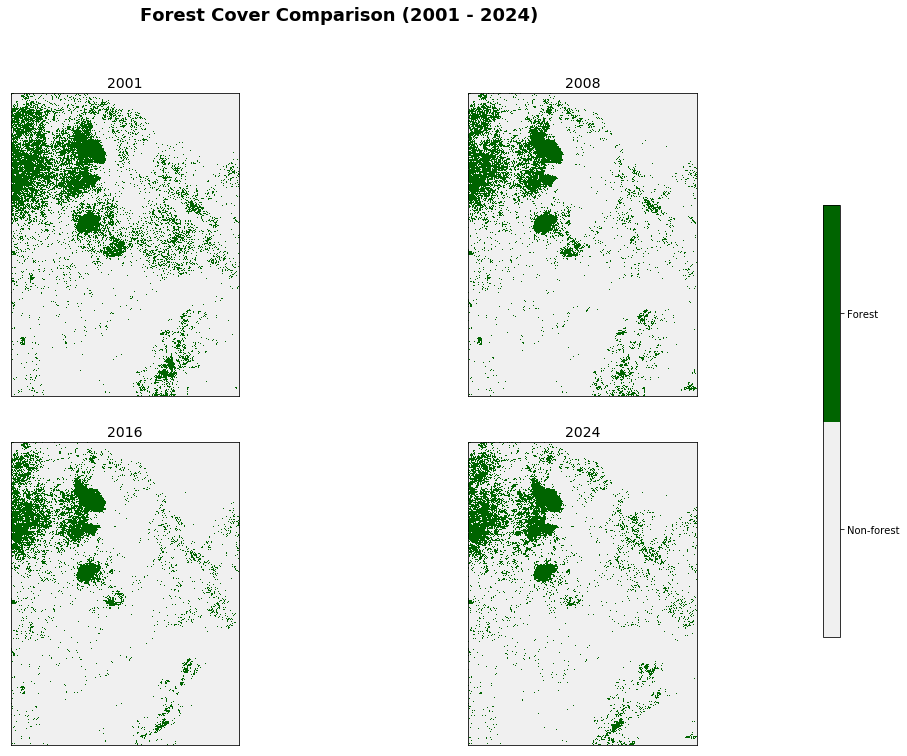

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(["#f0f0f0", "#006400"])

fig, ax_grid = plt.subplots(2, 2, figsize=(16, 12))
axes = ax_grid.ravel()

# --- plot your raster masks (same code as before)
for ax, (year, path) in zip(axes, sorted(forest_masks.items())):
    with rasterio.open(path) as src:
        mask = src.read(1).astype(float)
        bounds = src.bounds
        extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)

    ax.imshow(mask, cmap=cmap, vmin=0, vmax=1, extent=extent)
    ax.set_title(str(year), fontsize=14, pad=6)
    ax.set_xticks([])
    ax.set_yticks([])

# --- adjust subplot spacing
plt.subplots_adjust(wspace=0.05, hspace=0.15)

# --- centered main title, adjust 'y' upward as needed
fig.suptitle("Forest Cover Comparison (2001 - 2024)", 
             fontsize=18, fontweight='bold', y=0.98)

# --- add a single colorbar flush to the right
# create separate axes for colorbar
cbar_ax = fig.add_axes([0.92, 0.25, 0.015, 0.5])  # [left, bottom, width, height]

cbar = fig.colorbar(
    plt.cm.ScalarMappable(cmap=cmap),
    cax=cbar_ax
)
cbar.set_ticks([0.25, 0.75])
cbar.set_ticklabels(["Non-forest", "Forest"])

plt.show()
